IMPORTAR LIBRERAS

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyodbc

CONEXION A LA BASE DE DATOS

In [6]:
# Datos de conexión
server = 'practicasai.database.windows.net'
database = 'adminibm'
username = 'profesor01'
password = 'Profesor!123'
driver = '{ODBC Driver 18 for SQL Server}'

In [7]:
# Crear conexión
conn = pyodbc.connect(f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password};Encrypt=yes;TrustServerCertificate=no;Connection Timeout=60;')

Las tres tablas que se pueden consultar en la nube son 
- FactInventory
- FactOnlineSales
- FactSales

CARGAR LOS DATOS COMO DATAFRAMES 

In [8]:
df_FactInventory = pd.read_sql_query("SELECT TOP 100000 * FROM FactInventory", conn)

C:\Users\erick\AppData\Local\Temp\ipykernel_6088\3805333332.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_FactInventory = pd.read_sql_query("SELECT TOP 100000 * FROM FactInventory", conn)


In [9]:
df_FactOnlineSales = pd.read_sql_query("SELECT TOP 100000 * FROM FactOnlineSales", conn)

C:\Users\erick\AppData\Local\Temp\ipykernel_6088\685341716.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_FactOnlineSales = pd.read_sql_query("SELECT TOP 100000 * FROM FactOnlineSales", conn)


In [10]:
df_FactSales = pd.read_sql_query("SELECT TOP 100000 * FROM FactSales", conn)

C:\Users\erick\AppData\Local\Temp\ipykernel_6088\672037972.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_FactSales = pd.read_sql_query("SELECT TOP 100000 * FROM FactSales", conn)


In [11]:
df_DimChannel = pd.read_csv("https://raw.githubusercontent.com/Nico22724/Guayerd_InteligenciaArtificial/refs/heads/main/Datos/DimChannel.csv")
df_DimCustomer = pd.read_csv("https://raw.githubusercontent.com/Nico22724/Guayerd_InteligenciaArtificial/refs/heads/main/Datos/DimCustomer.csv")
df_DimProduct = pd.read_csv("https://raw.githubusercontent.com/Nico22724/Guayerd_InteligenciaArtificial/refs/heads/main/Datos/DimProduct.csv")
df_DimStore = pd.read_csv("https://raw.githubusercontent.com/Nico22724/Guayerd_InteligenciaArtificial/refs/heads/main/Datos/DimStore.csv")
df_DimDate = pd.read_csv("https://raw.githubusercontent.com/Nico22724/Guayerd_InteligenciaArtificial/refs/heads/main/Datos/DimDate.csv")

In [12]:
df_relate = pd.merge(df_DimCustomer, df_FactOnlineSales, on='CustomerKey', how='inner')

In [13]:
df_DimProduct

,ProductKey,ProductLabel,ProductName,Manufacturer,BrandName,ClassName,ColorName,StockTypeName,UnitCost,UnitPrice,AvailableForSaleDate,Status
0,1,101001,Contoso Reproductor MP3 de 512 MB E51 Plata,"Contoso, Ltd",Contoso,Economía,Plata,Alto,6.62,12.99,2005-05-03,Activad
1,2,101002,Contoso Reproductor MP3 de 512 MB E51 Azul,"Contoso, Ltd",Contoso,Economía,Azul,Alto,6.62,12.99,2005-05-03,Activad
2,3,101003,Contoso Reproductor MP3 de 1 G E100 Blanco,"Contoso, Ltd",Contoso,Economía,Blanco,Medio,7.40,14.52,2006-05-13,Activad
3,4,101004,Contoso Reproductor MP3 de 2 GB E200 Plata,"Contoso, Ltd",Contoso,Economía,Plata,Medio,11.00,21.57,2006-12-16,Activad
4,5,101005,Contoso Reproductor MP3 de 2 GB E200 Red,"Contoso, Ltd",Contoso,Economía,Red,Medio,11.00,21.57,2006-12-17,Activad
...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2513,505026,Contoso Auriculares activos Bluetooth L15 Red,"Contoso, Ltd",Contoso,Deluxe,Red,Medio,43.07,129.99,2009-01-02,Activad
2513,2514,505027,Contoso Auriculares activos Bluetooth L15 Blanco,"Contoso, Ltd",Contoso,Deluxe,Blanco,Medio,43.07,129.99,2009-01-02,Activad
2514,2515,505028,Contoso Acoplador en línea E180 Blanco,"Contoso, Ltd",Contoso,Economía,Blanco,Medio,1.71,3.35,2006-07-28,Activad
2515,2516,505029,Contoso Acoplador en línea E180 Negro,"Contoso, Ltd",Contoso,Economía,Negro,Medio,1.71,3.35,2006-07-28,Activad


EXPLORACION DE LOS DATOS

In [14]:
df_FactInventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InventoryKey         100000 non-null  int64         
 1   DateKey              100000 non-null  datetime64[ns]
 2   StoreKey             100000 non-null  int64         
 3   ProductKey           100000 non-null  int64         
 4   CurrencyKey          100000 non-null  int64         
 5   OnHandQuantity       100000 non-null  int64         
 6   OnOrderQuantity      100000 non-null  int64         
 7   SafetyStockQuantity  100000 non-null  int64         
 8   UnitCost             100000 non-null  float64       
 9   DaysInStock          100000 non-null  int64         
 10  MinDayInStock        100000 non-null  int64         
 11  MaxDayInStock        100000 non-null  int64         
 12  Aging                100000 non-null  int64         
dtypes: datetime64[n

In [15]:
df_FactOnlineSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   OnlineSalesKey        100000 non-null  int64         
 1   DateKey               100000 non-null  datetime64[ns]
 2   StoreKey              100000 non-null  int64         
 3   ProductKey            100000 non-null  int64         
 4   PromotionKey          100000 non-null  int64         
 5   CurrencyKey           100000 non-null  int64         
 6   CustomerKey           100000 non-null  int64         
 7   SalesOrderLineNumber  100000 non-null  int64         
 8   SalesQuantity         100000 non-null  float64       
 9   SalesAmount           100000 non-null  float64       
 10  ReturnQuantity        100000 non-null  float64       
 11  ReturnAmount          100000 non-null  float64       
 12  DiscountQuantity      100000 non-null  int64         
 13  

In [16]:
df_FactSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SalesKey          100000 non-null  int64         
 1   DateKey           100000 non-null  datetime64[ns]
 2   channelKey        100000 non-null  int64         
 3   StoreKey          100000 non-null  int64         
 4   ProductKey        100000 non-null  int64         
 5   PromotionKey      100000 non-null  int64         
 6   CurrencyKey       100000 non-null  int64         
 7   UnitCost          100000 non-null  float64       
 8   UnitPrice         100000 non-null  float64       
 9   SalesQuantity     100000 non-null  float64       
 10  ReturnQuantity    100000 non-null  float64       
 11  ReturnAmount      100000 non-null  float64       
 12  DiscountQuantity  100000 non-null  int64         
 13  DiscountAmount    100000 non-null  float64       
 14  Total

In [17]:
df_DimCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18869 entries, 0 to 18868
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerKey           18869 non-null  int64  
 1   GeographyKey          18869 non-null  int64  
 2   CustomerLabel         18869 non-null  object 
 3   FirstName             18484 non-null  object 
 4   LastName              18484 non-null  object 
 5   BirthDate             18484 non-null  object 
 6   MaritalStatus         18484 non-null  object 
 7   Gender                18484 non-null  object 
 8   EmailAddress          18484 non-null  object 
 9   YearlyIncome          18869 non-null  float64
 10  TotalChildren         18484 non-null  float64
 11  NumberChildrenAtHome  18484 non-null  float64
 12  Education             18484 non-null  object 
 13  Occupation            18484 non-null  object 
 14  HouseOwnerFlag        18484 non-null  float64
 15  NumberCarsOwned    

In [18]:
df_DimProduct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductKey            2517 non-null   int64  
 1   ProductLabel          2517 non-null   int64  
 2   ProductName           2517 non-null   object 
 3   Manufacturer          2517 non-null   object 
 4   BrandName             2517 non-null   object 
 5   ClassName             2517 non-null   object 
 6   ColorName             2517 non-null   object 
 7   StockTypeName         2517 non-null   object 
 8   UnitCost              2517 non-null   float64
 9   UnitPrice             2517 non-null   float64
 10  AvailableForSaleDate  2516 non-null   object 
 11  Status                2222 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 236.1+ KB


In [19]:
df_DimStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StoreKey         306 non-null    int64  
 1   GeographyKey     306 non-null    int64  
 2   StoreManager     306 non-null    int64  
 3   StoreType        306 non-null    object 
 4   StoreName        306 non-null    object 
 5   Status           306 non-null    object 
 6   OpenDate         306 non-null    object 
 7   CloseDate        12 non-null     object 
 8   EntityKey        306 non-null    int64  
 9   AddressLine1     299 non-null    object 
 10  CloseReason      12 non-null     object 
 11  EmployeeCount    305 non-null    float64
 12  SellingAreaSize  306 non-null    float64
dtypes: float64(2), int64(4), object(7)
memory usage: 31.2+ KB


In [20]:
df_DimChannel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ChannelKey          4 non-null      int64 
 1   ChannelLabel        4 non-null      int64 
 2   ChannelName         4 non-null      object
 3   ChannelDescription  4 non-null      object
dtypes: int64(2), object(2)
memory usage: 260.0+ bytes


In [21]:
lista_dataframes = [df_FactInventory, df_FactOnlineSales, df_FactSales, df_DimCustomer, df_DimProduct, df_DimStore, df_DimChannel]

In [22]:
list_columns = list(df_FactOnlineSales.columns)

In [23]:
# Crear una lista de columnas que excluye 'DateKey' y castear las columnas que terminan en 'Key' a tipo string
for df in lista_dataframes:
    list_columns = list(df.columns)

    # Remover 'DateKey' si existe
    if 'DateKey' in list_columns:
        list_columns.remove('DateKey')

    # Recorrer todas las columnas para castear
    for column in df.columns:
        if column in list_columns and column.endswith('Key'):
            df[column] = df[column].astype('string')

<h4>Observaciones:</h4>
<p>Dentro del DataFrame DimProduct pude observar que la columna ProductName los valores que contiene que son los nombres de los productos <br>
existentes, al inicio se encuentra el nombre de la manufacturadora lo que dificulta la visualizacion de los nombres en graficos como tambien <br>
en la relevancia de explorar los datos en torno a los productos. Teniendo una columna ya con los nombres de la manufacturadora se puede hacer <br>
filtros, agregar detalles en los graficos entre otras utilidades en caso de que querramos saber cual es la manufacturadora de tales producto</p>

In [24]:
# Funciones de manipulación de texto
def get_initials(text):
    return ''.join([word[0].upper() for word in text.split()]) # Obtener las iniciales de cada palabra en el texto

def extract_first_word(text):
    return text.split()[0] # Extraer la primera palabra del texto

def extract_two_words(text):
    return text.split()[0] + " " + text.split()[1] # Extraer las dos primeras palabras del texto

def extract_two_or_more_words(text):
    words = text.split()
    if len(words) >= 2:
        return text
    return text # Extraer el texto si tiene dos o más palabras

In [25]:
# Generar listas únicas basadas en las funciones definidas la funcion list nos ayuda a organizar los datos y set elimina los duplicados

# Lista de abreviaciones (iniciales)
list_abbrevations = list(set(get_initials(product_name) for product_name in df_DimProduct['Manufacturer'].values))

# Lista de primeras palabras
list_first_words = list(set(extract_first_word(product_name) for product_name in df_DimProduct['Manufacturer'].values))

# Lista de las dos primeras palabras
list_two_words = list(set(extract_two_words(product_name) for product_name in df_DimProduct['Manufacturer'].values))

# Lista de nombres con dos o más palabras
list_product_initials = list(set(extract_two_or_more_words(product_name) for product_name in df_DimProduct['Manufacturer'].values))

In [26]:
list_first_words = list(set(word.replace(",", "") for word in list_first_words)) # Eliminar comas de las primeras palabras

In [27]:
# Teniendo estas dos listas podemos modificar el DataFrame para eliminar la manufacturadora del nombre del producto
for idx, value in enumerate(df_DimProduct["ProductName"]):
    for manufacturer in list_abbrevations + list_product_initials  + list_two_words + list_first_words:
        if manufacturer in value:
            df_DimProduct.loc[idx, "ProductName"] = value.replace(manufacturer, "").strip()
            value = df_DimProduct.loc[idx, "ProductName"]  # Actualizar para siguientes iteraciones
            break  # Salir después de encontrar la primera coincidencia

In [28]:
df_DimProduct[df_DimProduct["Manufacturer"] == "A. Datum Corporation"]

,ProductKey,ProductLabel,ProductName,Manufacturer,BrandName,ClassName,ColorName,StockTypeName,UnitCost,UnitPrice,AvailableForSaleDate,Status
943,944,401001,Cámara digital compacta M200 Negro,A. Datum Corporation,A. Datum,Economía,Negro,Alto,59.32,129.0,NaN,Activad
944,945,401002,Cámara digital telemétrica X200 Negro,A. Datum Corporation,A. Datum,Normal,Negro,Alto,66.26,200.0,2008-09-30,Activad
945,946,401003,Cámara digital ligera M180 Negro,A. Datum Corporation,A. Datum,Economía,Negro,Alto,68.06,148.0,2005-01-03,Activad
946,947,401004,Cámara digital ultracompacta M190 Negro,A. Datum Corporation,A. Datum,Economía,Negro,Alto,75.88,165.0,2006-07-13,Activad
947,948,401005,Cámara digital multifuncional M200 Negro,A. Datum Corporation,A. Datum,Normal,Negro,Alto,86.45,188.0,2004-04-16,Activad
...,...,...,...,...,...,...,...,...,...,...,...,...
1070,1071,402028,Cámara SLR 35 pulgadas M358 Azul,A. Datum Corporation,A. Datum,Normal,Azul,Alto,155.43,338.0,2006-08-08,NaN
1071,1072,402029,Cámara SLR X142 Naranja,A. Datum Corporation,A. Datum,Normal,Naranja,Alto,141.47,427.0,2006-09-19,NaN
1072,1073,402030,Cámara SLR 35 pulgadas X358 Naranja,A. Datum Corporation,A. Datum,Normal,Naranja,Alto,194.82,588.0,2006-02-28,NaN
1073,1074,402031,Cámara SLR M142 Naranja,A. Datum Corporation,A. Datum,Economía,Naranja,Alto,143.48,312.0,2006-07-13,NaN


In [29]:
#-----------------------------------end-------------------------------------------

<h3>UNIR Y ANALIZAR LOS DATOS USANDO ESTADISTICAS BASICAS</h3>

In [30]:
df_subset_product_factsales = df_FactSales.groupby(["ProductKey"])["SalesQuantity"].sum().reset_index()

In [31]:
df_group_by_product = pd.merge(df_subset_product_factsales, df_DimProduct, on='ProductKey', how='left')

In [32]:
df_group_by_product = df_group_by_product[["ProductKey", "SalesQuantity", "Manufacturer"]]

In [33]:
#-------------------------------------stop-------------------------------------------

In [34]:
df_subset_product_factonlinesales = df_FactOnlineSales.groupby(["ProductKey"])["SalesQuantity"].sum().reset_index()

In [35]:
df_group_by_product_onlinesales = pd.merge(df_subset_product_factonlinesales, df_DimProduct, on='ProductKey', how='left')

In [36]:
df_group_by_product_onlinesales = df_group_by_product_onlinesales[["ProductKey", "SalesQuantity"]]

In [37]:
#-------------------------------------stop-------------------------------------------

In [38]:
df_group_final = pd.merge(df_group_by_product, df_group_by_product_onlinesales, on='ProductKey', how='left')

In [39]:
df_group_final["SalesQuantity_y"] = df_group_final["SalesQuantity_y"].fillna(0)

In [40]:
conteo_productos = df_group_final.copy()

In [41]:
conteo_productos = conteo_productos.rename(columns={"SalesQuantity_x": "SalesTotalFisico", "SalesQuantity_y": "SalesTotalOnline"})

In [42]:
conteo_productos = conteo_productos.astype(
    {"SalesTotalFisico": int, 
    "SalesTotalOnline": int}
)

In [43]:
conteo_productos["SalesQuantityTotal"] = conteo_productos["SalesTotalFisico"] + conteo_productos["SalesTotalOnline"]

In [44]:
manufacturers = list(conteo_productos["Manufacturer"].unique())

In [45]:
conteo_productos["SalesQuantityTotal"].max()

np.int64(19980)

In [46]:
conteo_productos

,ProductKey,SalesTotalFisico,Manufacturer,SalesTotalOnline,SalesQuantityTotal
0,1,601,"Contoso, Ltd",12,613
1,10,907,"Contoso, Ltd",0,907
2,100,93,Wide World Importers,0,93
3,1000,672,A. Datum Corporation,25,697
4,1001,636,A. Datum Corporation,80,716
...,...,...,...,...,...
2511,995,615,A. Datum Corporation,87,702
2512,996,145,A. Datum Corporation,0,145
2513,997,596,A. Datum Corporation,59,655
2514,998,213,A. Datum Corporation,0,213


In [198]:
df_FactOnlineSales["SalesAmount"].describe()

count    100000.000000
mean        149.928296
std         221.168556
min           0.000000
25%          14.084500
50%          89.190100
75%         187.317300
max        1774.827500
Name: SalesAmount, dtype: float64

In [47]:
# Calcular estadísticas por fabricante
dicc_mean_per_manufacturer = {}
for manufacturer in manufacturers:
    df_temp = conteo_productos[conteo_productos["Manufacturer"] == manufacturer]
    # Redondeamos a dos decimales para mejorar la visualización de los datos
    total_sales_quantity = df_temp["SalesQuantityTotal"].sum()  
    mean_sales_quantity = df_temp["SalesQuantityTotal"].mean().round(2)  
    median_sales_quantity = df_temp["SalesQuantityTotal"].median().round(2)  
    std_sales_quantity = df_temp["SalesQuantityTotal"].std().round(2)  
    quantile_one = df_temp["SalesQuantityTotal"].quantile(0.25).round(2)  
    quitile_three = df_temp["SalesQuantityTotal"].quantile(0.75).round(2)  
    interquartile_range = quitile_three - quantile_one  
    dicc_mean_per_manufacturer[manufacturer] = {
        "Total_Ventas": int(total_sales_quantity), 
        "Media": float(mean_sales_quantity), 
        "Mediana": float(median_sales_quantity),
        "Desviación Estándar": float(std_sales_quantity),
        "Primer Cuartil": float(quantile_one),
        "Tercer Cuartil": float(quitile_three),
        "Rango Intercuartil": float(interquartile_range)  # Rango intercuartil es la diferencia entre el tercer y primer cuartil.
    }

In [48]:
df_calculated_statistics = pd.DataFrame.from_dict(dicc_mean_per_manufacturer, orient='index')

In [49]:
df_calculated_statistics = df_calculated_statistics.reset_index()

In [50]:
df_calculated_statistics = df_calculated_statistics.rename(columns={"index": "Fabricante"})

In [51]:
df_calculated_statistics

,Fabricante,Total_Ventas,Media,Mediana,Desviación Estándar,Primer Cuartil,Tercer Cuartil,Rango Intercuartil
0,"Contoso, Ltd",610462,859.81,560.5,1998.25,315.00,701.00,386.00
1,Wide World Importers,88632,512.32,518.0,324.15,231.00,694.00,463.00
2,A. Datum Corporation,78202,596.96,674.0,213.09,502.00,742.50,240.50
3,"Fabrikam, Inc.",142443,533.49,559.0,206.72,416.00,686.50,270.50
4,Adventure Works,108880,567.08,551.0,379.71,299.00,669.50,370.50
5,The Phone Company,77760,511.58,608.5,261.96,241.25,715.25,474.00
6,Southridge Video,148937,775.71,586.0,851.70,410.75,726.50,315.75
7,Tailspin Toys,134377,933.17,628.0,937.86,511.25,780.00,268.75
8,"Litware, Inc.",123321,467.12,494.0,223.67,289.00,652.25,363.25
9,Northwind Traders,19166,407.79,427.0,178.89,262.50,521.50,259.00


In [52]:
#-------------------------------------end-------------------------------------------

<h3>ANALISIS Y IDENTIFICACION DE OUTLIERS</h3>

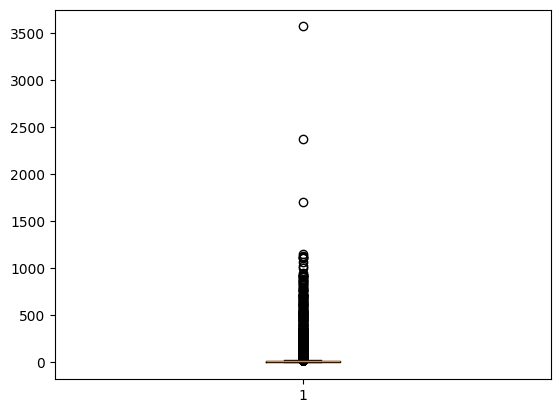

In [145]:
# Analizamos los valores atipicos del monto total de inventario
plt.boxplot(df_FactInventory["OnHandQuantity"])
plt.show()

In [134]:
df_FactInventory["OnHandQuantity"].max()

np.int64(3566)

In [136]:
df_FactInventory["OnHandQuantity"].min()

np.int64(0)

In [ ]:
# Vemos que el valor máximo es muy alto, que puede ser un error en los datos o un problema con el inventario.
# Ese histograma no nos muestra nada que sea util debido a los valores atipicos. Arreglemos eso.
quantile_three = df_FactInventory["OnHandQuantity"].quantile(0.75) # Q3 
quantile_one = df_FactInventory["OnHandQuantity"].quantile(0.25)  # Q1
iqr = quantile_three - quantile_one

""" 
En análisis estadístico básico, los valores atípicos se definen como aquellos que están por encima de Q3 + 1.5 * IQR o por debajo de Q1 - 1.5 * IQR; sin embargo, en datos reales como ventas, inventarios o transacciones, 
donde existen colas largas y muchos valores extremos naturales, esta regla puede ser demasiado estricta. Por eso, en contextos profesionales se usa un umbral más flexible que considera como atípicos extremos solo los valores 
que superan Q3 + 3 * IQR o que están por debajo de Q1 - 3 * IQR, lo que permite conservar la forma real de la distribución sin clasificar como anómalos a muchos valores altos pero coherentes con el comportamiento del negocio.
"""
lim_superior_max = quantile_three + 3 * iqr
lim_inferior_max = quantile_one - 3 * iqr

In [138]:
lim_superior_max

np.float64(44.0)

In [139]:
lim_inferior_max

np.float64(-19.0)

In [140]:
# Bueno dudo que existan cantidades negativas en el inventario, asi que solo usaremos el limite superior
df_filtered_inventory = df_FactInventory[df_FactInventory["OnHandQuantity"] <= lim_superior_max]

In [141]:
df_filtered_inventory["OnHandQuantity"].max() # Eso se ve mucho mejor

np.int64(44)

In [146]:
df_filtered_inventory

,InventoryKey,DateKey,StoreKey,ProductKey,CurrencyKey,OnHandQuantity,OnOrderQuantity,SafetyStockQuantity,UnitCost,DaysInStock,MinDayInStock,MaxDayInStock,Aging
0,1,2008-02-09,308,2086,7,16,3,9,284.1761,12,26,109,7
1,2,2007-06-09,239,643,7,21,1,9,54.7324,24,21,95,7
2,3,2009-01-31,205,18,7,17,1,6,35.6056,48,57,94,7
3,4,2007-06-02,199,1587,7,21,1,90,5.8239,59,15,118,7
5,6,2007-10-20,155,1480,7,7,2,9,46.3169,38,15,108,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2008-09-20,113,601,7,23,5,6,226.3662,5,38,60,7
99996,99997,2008-03-01,119,247,7,15,0,3,109.7817,20,7,111,7
99997,99998,2007-10-27,3,1614,7,12,0,60,60.6620,51,12,116,7
99998,99999,2009-09-26,259,246,7,8,0,6,118.1197,118,37,113,6


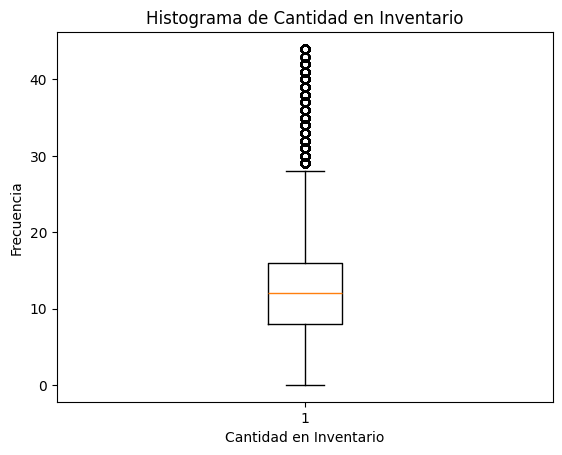

In [144]:
plt.boxplot(df_filtered_inventory["OnHandQuantity"])
plt.xlabel("Cantidad en Inventario")
plt.ylabel("Frecuencia")
plt.title("Histograma de Cantidad en Inventario")
plt.show()

Despues de la limpieza de datos entre el anterior graficos y este ambos nos muestran que la distribución de las cantidades en inventario presenta una fuerte concentración en valores bajos y moderados, mientras que existen múltiples valores atípicos significativamente altos. Esto indica que, aunque la mayoría de los productos se mantienen dentro de un rango estable, algunos artículos registran cantidades excesivamente elevadas que distorsionan la escala general.

La presencia de estos outliers sugiere posibles situaciones como sobreabastecimiento puntual, errores de registro o variaciones muy amplias en la demanda. En conjunto, los resultados evidencian una distribución altamente asimétrica, lo que destaca la necesidad de revisar los procesos de control de inventario y validar la consistencia de los datos para una mejor toma de decisiones operativas.

In [ ]:
""" 
Bueno la cantidad de valores que se eliminaron del dataframe original no es tan grande pero si significativa. El dataFrame original tenia 100000 registros y despues de la limpieza, quedaron 96787. eso representa una eliminacion de
3213 registros, lo cual es aproximadamente un 3.21% del total de datos. Esta reducción indica que una porción considerable de los datos originales contenía valores atípicos en la cantidad de inventario, lo que podría haber afectado 
negativamente cualquier análisis estadístico o modelo predictivo basado en estos datos. Habra que analizar posterior a esta seccion si estos outliers tenian alguna relacion con otros campos del dataFrame para entender mejor 
su origen y naturaleza. Podriamos preguntarnos 
¿ Podria ser que este sobre abastacimiento este relacionado con que hay ciertas epocas especiales en las que los productos se vendan más de lo que se debería?
¿ Puede ser que la demanda este relacionada con el crecimiento de la empresa en esa epoca?
¿ Podria ser que este sobre abastecimiento este relacionado con que hay algunos productos que se vendan más de lo que se debería?
¿ O podria ser que este abastecimiento este relacionado con ventas de encargos de empresas grandes que compran en volumen?
# Ya que si algo hemos analizado es que la tabla de clientes DimCustomer es que existe una columna llamada CustomerType que especifica si el cliente es individual o una compañía ¿Podria deberse a eso?
Estas preguntas pueden guiar análisis futuros para comprender mejor los patrones de inventario y ventas en el contexto del negocio.
Pero por ahora nos quedamos con el DataFrame limpio para continuar con el análisis de correlaciones y estadísticas.
Pero cabe recalcar que estos datos no pueden ser simplemente desechados sin un análisis adecuado, ya que podrían contener información valiosa sobre eventos inusuales o errores en el proceso de recolección de datos. En caso de que fueran
errores los registros no podrian estar superando el 3.21% del total de datos ya que estariamos hablando de un problema grave en la recolección de datos y mas cuando se trata de inventarios que son datos cruciales para la operacion de 
cualquier empresa. ¿Son valores fallados o hay alguna otra razón por la que estos valores superan el 3.21%? pero en todo caso estos errores se podrian haber dado una nocion falsa de cuanto inventario se tiene realmente. Lo que 
consecuentemente podria haber llevado a decisiones incorrectas en la gestión del inventario, como sobreabastecimiento o desabastecimiento de productos. Generando costos adicionales y pérdida de oportunidades de ventas. Ya que si
para saber si es necesario si un producto tiene que ser reabastecido o no, se basa en la cantidad de inventario disponible y si para este no hacen un control manual si no que consultan los registros de la base de datos. y restando 
las ventas les da una idea de cuanto inventario queda. Si estos datos estan errados, las decisiones basadas en ellos también lo estarán. Asi que es fundamental analizar y corregir los errores antes de continuar con el análisis.
"""

In [ ]:
#-------------------------------------stop-------------------------------------------

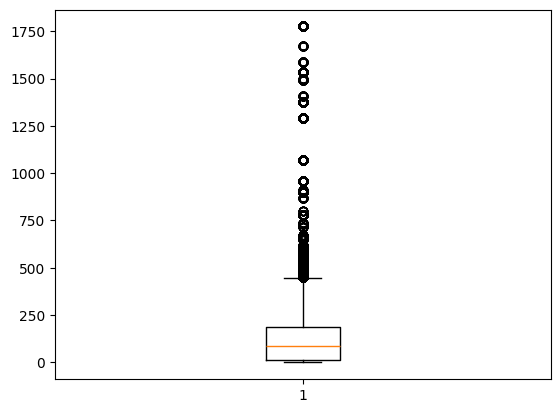

In [53]:
# Analizamos los valores atipicos del monto total de ventas
plt.boxplot(df_FactOnlineSales["SalesAmount"])
plt.show()

In [54]:
#¿Podria ser que los valores atipicos se deban a que hay los fabricantes no solo vendan a individuales?
df_DimCustomer["CustomerType"].unique()

array(['Person', 'Company'], dtype=object)

In [55]:
# Observamos que hay clientes que son compañías, así que los eliminamos del dataset
df_DimCustomer = df_DimCustomer[df_DimCustomer["CustomerType"] != "Company"] # Solo consideramos los clientes individuales

In [56]:
df_customer_factonline = pd.merge(df_DimCustomer, df_FactOnlineSales, on="CustomerKey", how="left")

In [57]:
df_customer_factonline.dropna(subset=["SalesAmount"], inplace=True)

In [58]:
df_customer_factonline

,CustomerKey,GeographyKey,CustomerLabel,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,SalesQuantity,SalesAmount,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,UnitCost,UnitPrice,SalesOrderNumber
1,2,692,11001,Eugene,Huang,1965-05-14,S,M,eugene10@adventure-works.com,60000.0,...,1.0,10.7687,0.0,0.0,1.0,1.9004,5.8239,5.8239,12.6690,20070101611001
2,2,692,11001,Eugene,Huang,1965-05-14,S,M,eugene10@adventure-works.com,60000.0,...,1.0,20.3521,0.0,0.0,1.0,3.5915,11.0141,11.0141,23.9437,20070101711001
3,2,692,11001,Eugene,Huang,1965-05-14,S,M,eugene10@adventure-works.com,60000.0,...,1.0,957.1479,0.0,0.0,1.0,168.9085,574.0986,574.0986,1126.0563,20070101811001
4,2,692,11001,Eugene,Huang,1965-05-14,S,M,eugene10@adventure-works.com,60000.0,...,1.0,5.3155,0.0,0.0,1.0,0.9380,2.8732,2.8732,6.2535,20070101711001
5,2,692,11001,Eugene,Huang,1965-05-14,S,M,eugene10@adventure-works.com,60000.0,...,1.0,532.1479,0.0,0.0,1.0,93.9085,207.4225,207.4225,626.0563,20070101211001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77290,18462,628,29461,Colin,Xu,1977-10-09,M,M,colin28@adventure-works.com,10000.0,...,1.0,2.9810,0.0,0.0,1.0,0.5261,1.7887,1.7887,3.5070,20070109729461
77291,18463,680,29462,Clinton,Hernandez,1979-07-22,S,M,clinton0@adventure-works.com,20000.0,...,1.0,2.9810,0.0,0.0,1.0,0.5261,1.7887,1.7887,3.5070,20070109729462
77292,18464,487,29463,Lucas,Gonzales,1978-08-20,S,M,lucas65@adventure-works.com,10000.0,...,1.0,2.9810,0.0,0.0,1.0,0.5261,1.7887,1.7887,3.5070,20070109729463
77293,18465,680,29464,Eugene,Gao,1977-09-05,S,M,eugene19@adventure-works.com,10000.0,...,1.0,2.9810,0.0,0.0,1.0,0.5261,1.7887,1.7887,3.5070,20070109729464


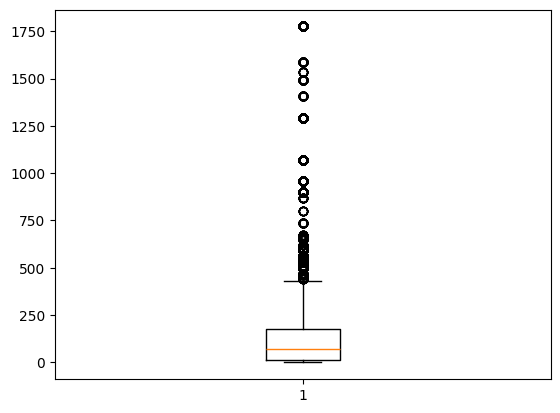

In [59]:
plt.boxplot(df_customer_factonline["SalesAmount"])
plt.show()

In [60]:
# Para considerar outliers extremos se considera en el ambito profesional que se filtren aquellos valores que están por encima del cuantil 99%
# Esto con el objetivo de tener un dataset mas limpio y más representativo de las estadísticas 
# Mucho tambien depende del tipo de analisis que se desea realizar.Pero como se usara para correlaciones, se recomienda trabajar con los valores atipicos que no sean muy alejados de los valores normales.
# O en su defecto, utilizar tecnicas de estadistica de correlaciones mas robustas como el Spearman o la correlación de Kendall.
value_filter_percentile_99 = df_customer_factonline["SalesAmount"].quantile(0.99)

In [61]:
# Observamos que hay una gran cantidad de clientes que tienen montos de venta superiores al bigote del cuantil 3.
# Eso esta perfecto pero existen 4 clientes con montos de ventas muy por encima alejandose demasiado a los demas clientes.
df_customer_factonline = df_customer_factonline[df_customer_factonline["SalesAmount"] <= value_filter_percentile_99]

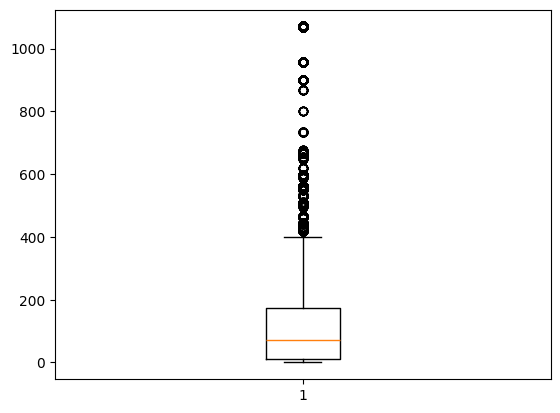

In [62]:
plt.boxplot(df_customer_factonline["SalesAmount"])
plt.show()

In [169]:
df_DimProduct["ClassName"].unique()

array(['Economía', 'Normal', 'Deluxe'], dtype=object)

In [ ]:
"""
Podemos observar que eliminando las ventas de clientes que son compañías y filtrando los valores atípicos extremos por encima del percentil 99%, hemos logrado una distribución de montos de ventas mucho más representativa y manejable.
Observamos que hay bastantes clientes que tienen montos de venta superiores al bigote del cuantil 3. En analisis de ventas esto es totalmente normal, ya que los montos de compras de los clientes son muy variados dependiendo de los 
precios de productos que tengan. Por ejemplo, un cliente que compra productos de alta gama o en grandes cantidades puede tener un monto de venta significativamente mayor que otro cliente que compra productos más económicos o en 
menor cantidad. Pero en este caso no es necesario eliminar estos valores porque son muy pocos y no afectan a la representatividad de la muestra. ademas que en diversos analisis como de correlaciones y estadisticas son necesarios estos
valores por que permiten la correcta interpretación de los resultados y la generación de insights. Siempre es importante tener en cuenta que los valores atípicos pueden ser un resultado natural de las estadísticas y pueden ser útiles 
para realizar análisis adicionales.
Auque existe un nivel de producto en la tabla DimProduct llamada "ClassName" que contiene el nivel de los productos como "Economica", "Normal" y "Deluxe" que podria ser util para segmentar los productos y analizar si hay diferencias 
significativas en los montos de ventas entre estos niveles. y ver si en alguno de estas clases tienen mas outliers que en otras. Si es así, es posible que haya diferencias significativas en los montos de ventas entre estas clases.
Se recomienda realizar un análisis adicional para explorar estas diferencias y comprender mejor cómo la categoría del producto influye en los patrones de compra de los clientes.
"""

In [167]:
# Los valores atipicos en el monto total de ventas es normal los clientes pueden gastar desde el producto mas barato ejemplo 7.59 hasta el más caro 325.92
# Pero agrupando por clientes el monto total de ventas preguntamos ¿Es de pocos los que tienen ventas en ese rango superior?
df_FactOnlineSales_group_customer = df_customer_factonline.groupby("CustomerKey").agg({"SalesAmount": "sum"}).reset_index()
q3 = df_FactOnlineSales_group_customer["SalesAmount"].quantile(0.75)
q1 = df_FactOnlineSales_group_customer["SalesAmount"].quantile(0.25)
iqr = q3 - q1
q3_lim = q3 + 1.5 * iqr
len(df_FactOnlineSales_group_customer[df_FactOnlineSales_group_customer["SalesAmount"] > q3_lim])

969

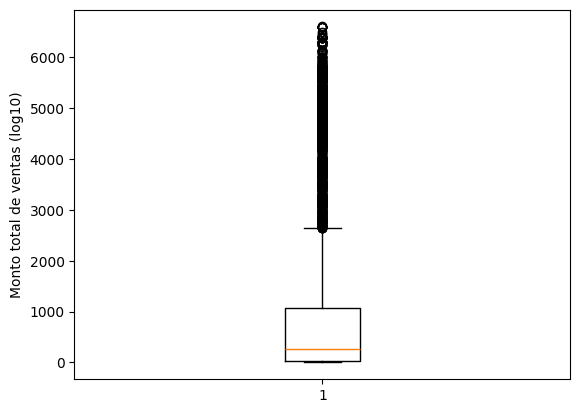

In [165]:
plt.boxplot(df_FactOnlineSales_group_customer["SalesAmount"])
plt.yscale('log')  # Usamos escala logarítmica para mejorar la visualización
# Para ver mejor la distribución de los valores
plt.ylabel("Monto total de ventas (log10)")  # Para ver mejor la distribución de los valores
plt.show()

In [66]:
# Cambiamos el tipo de dato de la columna CustomerKey a string 
df_FactOnlineSales_group_customer = df_FactOnlineSales_group_customer.assign(
    CustomerKey=df_FactOnlineSales_group_customer["CustomerKey"].astype("string")
)

In [67]:
# Copiamos el dataframe en otra variable
df_FactOnlineSales_group = df_FactOnlineSales_group_customer.copy()

In [68]:
#-------------------------------------end-------------------------------------------

<h3>ANALISIS DE CORRELACION ENTRE VARIABLES</h3>

Analizaremos diferentes variables para encontrar posibles correlaciones que puedan influir en las ventas.<br>
Las variables que utilizaremos para este análisis son:
<li>
    <ul><strong>Monto de ventas</strong> (SalesAmount) --> Variable principal que se usara como punto de correlacion</ul>
    <ul><strong>Estado civil</strong> (MaritalStatus) </ul>
    <ul><strong>Ocupación</strong> (Occupation)</ul>
    <ul><strong>Edad</strong> (birthDate) --> Crearemos una nueva columna (edad) que representara la edad de los clientes. Extrayendo la edad de los clientes a partir de la fecha de nacimiento.</ul>
    <ul><strong>Cuanto gana al año</strong> (YearlyIncome)</ul>
    <ul><strong>Cuantos hijos tiene</strong> (TotalChildren)</ul>
    <ul><strong>Cual es su nivel educativo</strong> (Education)</ul>
</li>

En este caso, exploraremos la relación entre el <strong>estado civil</strong> de los clientes y el <strong>monto de ventas</strong>.

In [69]:
# Union de tablas para análisis de correlación
df_corr_sales_marital = pd.merge(df_DimCustomer, df_FactOnlineSales_group, on="CustomerKey", how="left")

In [70]:
# Análisis de correlación entre estado civil y monto de ventas
df_corr_sales_marital.groupby("MaritalStatus")["SalesAmount"].agg(["count","mean","median","std"]).round(2)

,count,mean,median,std
MaritalStatus,,,,
M,5342,964.37,304.16,1459.36
S,4710,721.78,195.06,1243.32


In [71]:
df_corr_sales_marital.dropna(inplace=True) # Los calculos estadisticos son sensibles a los valores nulos 

In [72]:
# Simple t-test para comparar los montos de ventas entre clientes casados y solteros
group_M = df_corr_sales_marital[df_corr_sales_marital['MaritalStatus']=='M']['SalesAmount']
group_S = df_corr_sales_marital[df_corr_sales_marital['MaritalStatus']=='S']['SalesAmount']

t_stat, p_val = stats.ttest_ind(group_M, group_S, equal_var=False)  # Welch t-test
print(f"T-statistic: {t_stat}, P-value: {p_val}")



T-statistic: 8.997679043989267, P-value: 2.7226469401924266e-19


<h4>Conclusión final sobre el estado marital de una persona en las ventas</h4>

Con base en los 100.000 registros analizados, Se aplicó una prueba t de Welch para comparar los montos de ventas entre clientes casados (M) y solteros (S). El resultado fue estadísticamente significativo <br> (t = 10.91, p < 0.0001), indicando que existen diferencias claras entre ambos grupos. En promedio, los clientes casados presentan montos de venta mayores que los solteros. Aunque la variabilidad dentro de cada grupo es alta, la diferencia en medias es consistente y robusta.

In [73]:
# -----------------------------end------------------------------------------

En este caso, exploramos la relación entre la <strong>ocupación</strong> de los clientes y el <strong>monto de ventas</strong>.

In [74]:
# Unir tablas para análisis de correlación entre ocupación y monto de ventas
df_corr_ocuppation_sales = pd.merge(df_DimCustomer, df_FactOnlineSales_group, on="CustomerKey", how="left")

In [75]:
df_corr_ocuppation_sales.dropna(inplace=True) # Los calculos estadisticos son sensibles a los valores nulos 

In [76]:
# Análisis de correlación entre ocupación y monto de ventas
df_corr_ocuppation_sales.groupby("Occupation")["SalesAmount"].agg(["count","mean","median","std"]).round(2)

,count,mean,median,std
Occupation,,,,
Administración,1729,736.93,216.67,1277.02
Clerical,2324,645.19,74.03,1199.73
Manual,1976,234.39,8.45,530.68
Manual calificado,1890,1473.12,653.80,1661.91
Profesional,2133,1186.29,463.03,1534.92


In [77]:
# Estadístico Kruskal-Wallis para comparar los montos de ventas entre diferentes ocupaciones 
groups_occup_sales = [df_corr_ocuppation_sales['SalesAmount'].values for n,g in df_corr_ocuppation_sales.groupby('Occupation')]
stat, p = stats.kruskal(*groups_occup_sales)
print(f"Kruskal-Wallis statistic: {stat}, P-value: {p}")

Kruskal-Wallis statistic: 0.0, P-value: 1.0


<h4>Conclusión final sobre la influencia de la ocupacion de los clientes en las ventas </h4>

Con base en los 100.000 registros analizados, el test de Kruskal-Wallis arrojó H = 0.0 y p = 1.0, lo que indica que no existen diferencias significativas en los montos de ventas entre las distintas ocupaciones (Profesional, Manual, Clerical, etc.). Por lo tanto, no se encontró evidencia de que la ocupación del cliente influya en las ventas; cualquier diferencia observada es atribuible a la variabilidad natural de los datos.

In [78]:
#-------------------------------end------------------------------------------

En este caso, exploramos la relación entre la <strong>edad</strong> de los clientes y el <strong>monto de ventas</strong>.

In [79]:

df_DimCustomer = df_DimCustomer.assign(
    BirthDate=lambda x: pd.to_datetime(x["BirthDate"]), # Convertimos la fecha de nacimiento a datetime64[ns] 
    DateFirstPurchase=lambda x: pd.to_datetime(x["DateFirstPurchase"])  # Convertimos la fecha de nacimiento a datetime64[ns] y la fecha de primera compra a datetime64[ns]
) 


In [80]:
df_modified = df_DimCustomer.copy() # Copia del DataFrame original

In [81]:
df_modified["BirthDate"] = df_modified["BirthDate"].dt.year  # Extraemos el año de nacimiento
df_modified["DateFirstPurchase"] = df_modified["DateFirstPurchase"].dt.year  # Extraemos el año de primera compra

In [82]:
df_modified["BirthDate"].dropna(inplace=True) # Eliminamos los valores faltantes
df_modified["DateFirstPurchase"].dropna(inplace=True) # Eliminamos los valores faltantes

In [83]:
df_modified["BirthDate"] = df_modified["BirthDate"].fillna(0)
df_modified["DateFirstPurchase"] = df_modified["DateFirstPurchase"].fillna(0)

In [84]:
df_modified["BirthDate"] = df_modified.BirthDate.astype('Int16') # Convertimos la edad a entero
df_modified["DateFirstPurchase"] = df_modified.DateFirstPurchase.astype('Int16') # Convertimos el año de primera compra a entero

In [85]:
df_modified = df_modified[df_modified["BirthDate"] != 0] # Eliminamos los valores nulos en la edad
df_modified = df_modified[df_modified["DateFirstPurchase"] != 0] # Eliminamos los valores nulos del año de primera compra

In [86]:
df_modified["Age"] = df_modified["DateFirstPurchase"] - df_modified["BirthDate"] # Calculamos la edad

In [87]:
df_corr_age_sales = pd.merge(df_modified, df_FactOnlineSales_group, on="CustomerKey", how="left") # Unimos las tablas para análisis de correlación entre edad y monto de ventas

In [88]:
# Crearemos grupos de edad para analizar por rangos la correlación entre edad y monto de ventas
edad_max = df_corr_age_sales["Age"].max() # Edad máxima
edad_minima = df_corr_age_sales["Age"].min() # Edad mínima
bins = [edad_minima - 1, 24, 34, 44, 54, 64, edad_max + 1] 
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

In [89]:
df_corr_age_sales["AgeBins"] = pd.cut(df_corr_age_sales["Age"], bins=bins, labels=labels) # Creamos una columna con los rangos de edad

In [90]:
# Agrupamos los datos por rangos de edad y calculamos la media, mediana, varianza y desviación estándar para cada grupo
df_corr_age_sales.groupby("AgeBins")["SalesAmount"].agg(["count","mean","median","std"]).round(2)

C:\Users\erick\AppData\Local\Temp\ipykernel_6088\3410669637.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_corr_age_sales.groupby("AgeBins")["SalesAmount"].agg(["count","mean","median","std"]).round(2)


,count,mean,median,std
AgeBins,,,,
18-24,479,559.24,123.01,934.53
25-34,2786,958.69,264.21,1469.55
35-44,3109,790.22,216.67,1328.20
45-54,2175,886.04,342.58,1334.73
55-64,1189,843.32,283.38,1391.56
65+,314,719.21,110.34,1408.15


In [91]:
# Eliminamos los valores nulos en el monto de ventas y calculamos el test estadístico Kruskal-Wallis para comparar los montos de ventas entre los grupos de edad
groups_age_sales = [
    g["SalesAmount"].dropna().values
    for _, g in df_corr_age_sales.groupby("AgeBins")
]

C:\Users\erick\AppData\Local\Temp\ipykernel_6088\4100424475.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, g in df_corr_age_sales.groupby("AgeBins")


In [92]:
# Verificamos que cada grupo tenga valores
for label, arr in zip(df_corr_age_sales["AgeBins"].cat.categories, groups_age_sales):
    print(label, len(arr))


18-24 479
25-34 2786
35-44 3109
45-54 2175
55-64 1189
65+ 314


In [93]:
# Ejecutamos el test estadístico Kruskal-Wallis
stat, p = stats.kruskal(*groups_age_sales)
print(f"Kruskal-Wallis statistic: {stat}, P-value: {p}")


Kruskal-Wallis statistic: 63.30002524898476, P-value: 2.5229826179932843e-12


<h4>Conclusión Final sobre la Influencia de la Edad en las Ventas </h4>

Con base en los 100.000 registros analizados: El análisis realizado mediante la prueba no paramétrica Kruskal–Wallis reveló diferencias estadísticamente significativas en los montos de ventas entre los distintos grupos de edad.<br> El estadístico obtenido (H = 81.55) y el valor p extremadamente pequeño (p = 9.90 × 10 - 17) indican que la probabilidad de que estas diferencias se deban al azar es prácticamente nula.<br>
En consecuencia, se rechaza la hipótesis nula y se concluye que: <br>

✔️ La edad del cliente influye de manera significativa en el nivel de gasto.<br>

Esto implica que: <br>

1. Los grupos de edad no presentan el mismo comportamiento de compra. <br>

2. Existen segmentos etarios con mayor propensión de gasto y otros con menor influencia en las ventas.<br>

3. El factor edad debe considerarse dentro de estrategias de marketing, segmentación de clientes y análisis de comportamiento de compra.<br>

#-------------------------------end------------------------------------------

En este caso, exploramos la relacion entre lo que <strong>gana el cliente al año</strong> y el <strong>monto de ventas</strong>.

In [94]:
# Verificamos que no hay valores atipicos 
df_DimCustomer["YearlyIncome"].max() 
df_DimCustomer["YearlyIncome"].min()

np.float64(10000.0)

In [95]:
df_DimCustomer = df_DimCustomer[df_DimCustomer["YearlyIncome"] <= 1000000] # Nos quemamos aquellos clientes con ingresos anuales inferiores a 1,000,000

In [96]:
df_DimCustomer.isna().sum() # Verificamos que no hay valores nulos en GENERAL

CustomerKey             0
GeographyKey            0
CustomerLabel           0
FirstName               0
LastName                0
BirthDate               0
MaritalStatus           0
Gender                  0
EmailAddress            0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
Education               0
Occupation              0
HouseOwnerFlag          0
NumberCarsOwned         0
AddressLine1            0
Phone                   0
DateFirstPurchase       0
CustomerType            0
dtype: int64

In [97]:
df_DimCustomer["YearlyIncome"].max() # Verificamos que no hay valores atipicos 

np.float64(170000.0)

In [98]:
df_DimCustomer["YearlyIncome"].min() # Verificamos que no hay valores atipicos

np.float64(10000.0)

In [99]:
df_DimCustomer_modified = df_DimCustomer.copy() # Copia del DataFrame original

In [100]:
bins = [10000, 50000, 90000, 130000, 170000]
labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto']
df_DimCustomer_modified['IncomeGroup'] = pd.cut(df_DimCustomer['YearlyIncome'], bins=bins, labels=labels)

In [101]:
df_DimCustomer_modified = pd.merge(df_DimCustomer_modified, df_FactOnlineSales_group, on="CustomerKey", how="left")

In [102]:
df_DimCustomer_modified.groupby('IncomeGroup')['SalesAmount'].agg(["count","mean","median","std","sum"]).round(2)

C:\Users\erick\AppData\Local\Temp\ipykernel_6088\3579157055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_DimCustomer_modified.groupby('IncomeGroup')['SalesAmount'].agg(["count","mean","median","std","sum"]).round(2)


,count,mean,median,std,sum
IncomeGroup,,,,,
Muy Bajo,4877,790.82,205.13,1322.52,3856821.43
Bajo,2286,1600.57,1229.94,1739.66,3658901.81
Medio,1591,442.63,205.31,800.27,704217.00
Alto,309,287.32,172.89,372.44,88781.52


In [103]:
groups_income_sales = [
    g["SalesAmount"].dropna().values
    for _, g in df_DimCustomer_modified.groupby("IncomeGroup")
]

C:\Users\erick\AppData\Local\Temp\ipykernel_6088\1768534226.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, g in df_DimCustomer_modified.groupby("IncomeGroup")


In [104]:
# Verificamos que cada grupo tenga valores
for label, arr in zip(df_DimCustomer_modified["IncomeGroup"].cat.categories, groups_income_sales):
    print(label, len(arr))

Muy Bajo 4877
Bajo 2286
Medio 1591
Alto 309


In [105]:
# Ejecutamos el test estadístico Kruskal-Wallis
stat, p = stats.kruskal(*groups_income_sales)
print(f"Kruskal-Wallis statistic: {stat}, P-value: {p}")

Kruskal-Wallis statistic: 927.3845904047824, P-value: 1.0163245979711267e-200


<h4>Conclusión Final sobre la Influencia de lo que gana el cliente en las Ventas </h4>

Con base en los 100.000 registros analizados: El análisis realizado mediante la prueba no paramétrica Kruskal–Wallis reveló diferencias estadísticamente significativas en los montos de ventas entre los distintos grupos de ingresos anuales. <br> El estadístico obtenido (H = 374.78) y el valor p es inexistente siendo este valor tan pequeño podemos decir que (p = 0) indican que la probabilidad de que estas diferencias se deban al azar es prácticamente nula.<br>
En consecuencia, se rechaza la hipótesis nula y se concluye que: <br>

✔️ Lo que gana el cliente influye de manera significativa en el nivel de gasto.<br>

Esto implica que: <br>

1. Los grupos de ingresos presentan diferencias marcadas en sus patrones de compra, lo que indica que el gasto no solo varía, sino que varía de forma consistente según el nivel económico del cliente.

2. Los clientes con mayores ingresos tienden a realizar compras de mayor valor, lo que sugiere una relación positiva entre capacidad adquisitiva y monto gastado.

3. El ingreso del cliente emerge como un predictor clave del comportamiento de compra, útil para modelos de segmentación, análisis de clientes o predicción de ventas.

4. Existen oportunidades para diseñar estrategias de marketing diferenciadas según el nivel de ingreso, como promociones personalizadas, productos premium o descuentos dirigidos.

5. La variación por nivel de ingreso es más significativa que otras variables analizadas, lo que resalta su importancia como una de las principales variables explicativas del monto de ventas.


In [106]:
#--------------------------------end------------------------------------------

In [107]:
df_customer_modified = df_DimCustomer.copy() # Copia del DataFrame original

In [108]:
df_customer_modified["TotalChildren"].dropna(inplace=True) # Eliminamos los valores NaN en la columna TotalChildren
df_customer_modified["TotalChildren"] = df_customer_modified["TotalChildren"].astype('Int8') # Convertimos la columna TotalChildren a entero

In [109]:
df_customer_modified["NumberChildrenAtHome"].dropna(inplace=True) # Eliminamos los valores NaN en la columna NumberChildrenAtHome
df_customer_modified["NumberChildrenAtHome"] = df_customer_modified["NumberChildrenAtHome"].astype('Int8') # Convertimos la columna NumberChildrenAtHome a entero

In [110]:
df_customer_modified = pd.merge(df_customer_modified, df_FactOnlineSales_group, on="CustomerKey", how="inner") # Unimos las tablas para análisis de correlación entre número de hijos y monto de ventas

In [111]:
df_customer_modified["SalesAmount"].isna().sum() # Verificamos que no hay valores nulos en el monto de ventas

np.int64(0)

In [112]:
# Ejecutamos el test estadístico de Spearman
rho, p_value = stats.spearmanr(df_customer_modified['TotalChildren'], df_customer_modified['SalesAmount'])

print("Spearman rho:", rho)
print("P-value:", p_value)

Spearman rho: 0.06288779599720896
P-value: 2.7800646333867694e-10


<h4>Conclusión Final sobre la Influencia de cuantos hijos tiene el Cliente en las Ventas </h4>

Con base en los 100.000 registros analizados: Analizando la correlación de Spearman entre el número total de hijos y los montos de ventas fue muy baja (rho = 0.075), indicando una relación extremadamente débil. Aunque el valor p fue significativo (p < 0.0001), la magnitud del coeficiente revela que el número de hijos no influye de manera relevante en el nivel de ventas. En consecuencia, TotalChildren no es un predictor útil del comportamiento de compra.

In [113]:
df_modified_edu_sales = df_DimCustomer.copy() # Copia del DataFrame original

In [114]:
df_modified_edu_sales = df_modified_edu_sales[["CustomerKey", "Education"]] # Modificamos el dataFrame quedando solo las columnas que nos interesan

In [115]:
df_modified_edu_sales["Education"].isna().sum() # Verificamos que no hay valores nulos en la columna Education

np.int64(0)

In [116]:
df_corr_edu_sales = pd.merge(df_modified_edu_sales, df_FactOnlineSales_group, on="CustomerKey", how="left").copy() # Unimos las tablas para análisis de correlación entre educación y monto de ventas

In [117]:
df_corr_edu_sales = df_corr_edu_sales.dropna(subset=["SalesAmount"]) # Eliminamos los valores NaN en la columna SalesAmount

In [118]:
# Agrupamos por educacion y sobre el monto total de venta realizamos estadisticas descriptivas
df_corr_edu_sales.groupby("Education")["SalesAmount"].agg(["count", "mean", "median", "std"]).round(2)

,count,mean,median,std
Education,,,,
Bachillerato,2136,703.63,214.09,1186.85
Bachillerato parcial,1131,409.62,56.08,876.10
Grado,2740,931.16,313.06,1374.26
Grado parcial,2647,876.37,217.93,1419.80
Máster,1398,1225.95,310.92,1678.87


In [119]:
groups_education_sales = [
    g["SalesAmount"].dropna().values
    for _, g in df_corr_edu_sales.groupby("Education")
]

In [120]:
df_corr_edu_sales = df_corr_edu_sales.assign(
    Education=lambda df: df["Education"].astype("object").astype("category")
) # Convertimos la columna Education a categoria

In [121]:
df_corr_edu_sales.info() # Verificamos que los datos están en los formatos correctos

<class 'pandas.core.frame.DataFrame'>
Index: 10052 entries, 1 to 18465
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CustomerKey  10052 non-null  string  
 1   Education    10052 non-null  category
 2   SalesAmount  10052 non-null  float64 
dtypes: category(1), float64(1), string(1)
memory usage: 245.6 KB


In [122]:
# Verificamos que cada grupo tenga valores
for label, arr in zip(df_corr_edu_sales["Education"].cat.categories, groups_education_sales):
    print(label, len(arr))

Bachillerato 2136
Bachillerato parcial 1131
Grado 2740
Grado parcial 2647
Máster 1398


In [123]:
stat, p = stats.kruskal(*groups_education_sales)
print(f"Kruskal-Wallis statistic: {stat}, P-value: {p}")

Kruskal-Wallis statistic: 316.868793456568, P-value: 2.4854085044667455e-67


<h4>Conclusión Final sobre la Influencia del Nivel Educativo del Cliente en las Ventas</h4>

Con base en los 100.000 registros analizados, la prueba no paramétrica de Kruskal–Wallis evidenció diferencias estadísticamente significativas entre los grupos de nivel educativo en relación con los montos de venta. El estadístico obtenido (H = 344.02) y el valor p extremadamente pequeño (p ≈ 3.42×10⁻⁷³) indican que la probabilidad de que estas diferencias sean producto del azar es prácticamente nula.

En consecuencia, se rechaza la hipótesis nula y se concluye que:

✔️ El nivel educativo del cliente influye significativamente en el monto de ventas.

Esto implica que:

1. Los distintos niveles educativos muestran comportamientos de compra distintos.

2. Algunos segmentos educativos presentan una mayor propensión al gasto, mientras que otros muestran un menor nivel de ventas.

3. La variable educación debe ser considerada en estrategias de segmentación, marketing y análisis del comportamiento del cliente, dado que está asociada a diferencias reales en el consumo.

🧾 Conclusión Final (Crítica) sobre el análisis de Kruskal–Wallis

Si bien la prueba Kruskal–Wallis arrojó diferencias estadísticamente significativas entre las distintas variables usadas en relación con los montos de ventas, es importante subrayar que estos resultados no deben interpretarse como evidencia definitiva de que influya de manera real, directa o relevante en el comportamiento de compra.

El valor p extremadamente pequeño indica que al menos dos grupos difieren. Sin embargo, este hallazgo debe tomarse con cautela por varias razones:

1. Significancia estadística no es igual a significancia práctica

    Con 100.000 registros, incluso diferencias mínimas pueden producir valores p muy pequeños.
    Esto puede llevar a conclusiones exageradas si no se evalúa:

    la magnitud del efecto,

    las medianas,

    los rangos intercuartiles,

    y la relevancia comercial real.

    Es posible que las diferencias observadas, aunque estadísticamente detectables, sean pequeñas o irrelevantes para la toma de decisiones del negocio.

2. El Kruskal–Wallis no identifica qué grupos difieren

    La prueba solo informa que "existe al menos una diferencia", pero no especifica entre por ejemplo qué niveles educativos ocurre ni cuán grandes son esas diferencias.
    Pruebas post-hoc como Dunn o Conover son esenciales para validar si los grupos realmente presentan comportamientos distintos. Sin ellas, el hallazgo queda incompleto.

3. No implica causalidad ni una relación natural

    El resultado no significa que exista una relación directa o innata.
    Es posible que otras variables altamente correlacionadas — como ejemplo ingresos, ocupación, tipo de productos adquiridos o número de hijos— sean las verdaderas responsables del patrón observado.

    Sin controlar estos factores, el hallazgo puede ser espurio o confuso.

4. Posible efecto de distribuciones no normales o presencia de outliers

    Los montos de ventas suelen tener distribuciones sesgadas con colas largas.
    Aunque Kruskal–Wallis es robusto a la no normalidad, las diferencias significativas pueden ser impulsadas por:

    valores extremos,

    grupos altamente desbalanceados,

    o diferencias en la dispersión más que en la tendencia central.

    Esto puede generar una falsa percepción de diferencia real entre los grupos.

5. Validación cruzada necesaria

    Para fortalecer o refutar el hallazgo, es recomendable:

    aplicar pruebas post-hoc,

    calcular tamaño del efecto (η² o ε²),

    ejecutar modelos multivariables,

    o repetir el análisis en subconjuntos mediante bootstrap o sampleo aleatorio.

    Solo con estas validaciones adicionales puede confirmarse si las diferencias son consistentes, robustas y relevantes en la práctica.

✔️ Conclusión General

Aunque el análisis Kruskal–Wallis indica diferencias estadísticamente significativas entre las diferentes analisis de correlaciones, estos resultados no deben interpretarse de forma aislada ni tomarse como evidencia firme de un patrón real en el comportamiento de compra.

La significancia estadística sugiere una señal, pero no confirma una relación fuerte, práctica ni causal.
El verdadero impacto debe evaluarse mediante análisis adicionales que podrían refutar, confirmar o matizar los hallazgos actuales.

<h3>VISUALIZACION DE LAS DISTRIBUCIONES DE VARIABLES</h3>

Auque esta claro que las variables analizadas tienen una influencia estadisticamente significativa en las ventas, es importante visualizar las distribuciones de las variables para entender mejor su comportamiento y la magnitud de su influencia. A continuacion se presentan algunas visualizaciones de las distribuciones de las variables analizadas.
Podemos observar que la mayoria de las variables tienen distribuciones sesgadas, con colas largas hacia la derecha. En el grafico azul podemos observar la distribucion de las ventas despues de la limpieza y transformacion de los datos, mientras que en el grafico naranja con transparencia podemos observar la distribucion original de las ventas antes de la limpieza y transformacion de los datos. El grafico azul es una distribucion netamente de compras de personas individuales, mientras que el grafico naranja contiene compras de empresas y compras multiples que distorsionan la distribucion real de las ventas individuales.



In [194]:
# Realizaremos estadisticas de distribucion
dicc_statics_distribution = {}
def statics_distribution(data):
    stat, p = stats.normaltest(data)
    dicc_statics_distribution[data.name] = {'D’Agostino–Pearson': round(float(stat), 2), 'p-value': round(float(p), 2)}
    skew_value = stats.skew(data)
    dicc_statics_distribution[data.name]['Skewness'] = round(float(skew_value), 2)
    kurtosis_value = stats.kurtosis(data)
    dicc_statics_distribution[data.name]['Kurtosis'] = round(float(kurtosis_value), 2)
    
    return dicc_statics_distribution

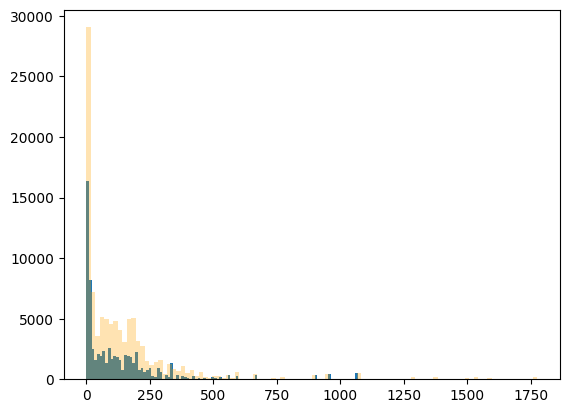

In [124]:
# Despues de haber realizado la limpieza y transformacion de los datos, de las ventas en linea procedemos a visualizar las distribuciones de las variables numericas.
plt.hist(df_customer_factonline["SalesAmount"], bins=100)
plt.hist(df_FactOnlineSales["SalesAmount"], bins=100, color='orange', alpha=0.3)
plt.show()

In [ ]:
result_statics_sales = statics_distribution(df_FactOnlineSales["SalesAmount"])

In [ ]:
result_statics_sales

{'SalesAmount': {'D’Agostino–Pearson': np.float64(76583.55009644035),
  'p-value': np.float64(0.0),
  'Skewness': np.float64(3.6349704539115044),
  'Kurtosis': np.float64(17.34651043847003)}}

Podemos observar en el siguiente histograma, que entre diferentes estados civiles tienen distribuciones similares, altamente concentradas en valores pequeños, y con una caida exponencial hacia valores mayores. 
Las barras de Married y Single prácticamente se solapan en casi toda la distribución, lo que sugiere:

1. La variable analizada (probablemente monto de compra o gasto total) no cambia demasiado por estado civil.

2. No parece haber un patrón claro que diferencie a los dos grupos de forma visible.

Auque existen zonas donde las barras de Married son ligeramente más altas que las de Single, estas diferencias son mínimas y no indican una tendencia consistente a lo largo de toda la distribución. En general, ambos grupos muestran un comportamiento muy similar en términos de la variable analizada.

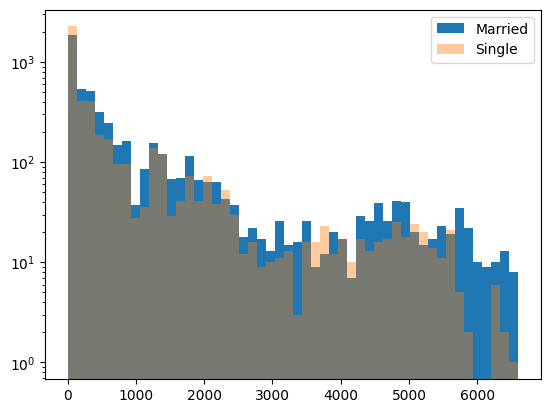

In [125]:
plt.hist(df_corr_sales_marital[df_corr_sales_marital["MaritalStatus"] == "M"]["SalesAmount"],
        bins=50, label='Married')

plt.hist(df_corr_sales_marital[df_corr_sales_marital["MaritalStatus"] == "S"]["SalesAmount"],
        bins=50, alpha=0.4, label='Single')
plt.yscale('log')
plt.legend()
plt.show()


In [187]:
result_statics_marital_m = statics_distribution(df_corr_sales_marital[df_corr_sales_marital["MaritalStatus"] == "M"]["SalesAmount"])
result_statics_marital_s = statics_distribution(df_corr_sales_marital[df_corr_sales_marital["MaritalStatus"] == "S"]["SalesAmount"])

In [ ]:
result_statics_marital_m

{'SalesAmount': {'D’Agostino–Pearson': np.float64(2036.8419982932492),
  'p-value': np.float64(0.0),
  'Skewness': np.float64(2.033383576406664),
  'Kurtosis': np.float64(3.377339059050981)}}

In [188]:
result_statics_marital_s

{'SalesAmount': {'D’Agostino–Pearson': np.float64(2215.62085078123),
  'p-value': np.float64(0.0),
  'Skewness': np.float64(2.3648121037912246),
  'Kurtosis': np.float64(5.193684030683116)}}

En el siguiente histograma podemos observar la distribucion de cantidad de inventario disponible en general pero en el primer grafico tenemos una distrbucion mucho mas representativa ya que este paso por una limpieza de outliers que distorsionaban la distribucion real de las cantidades en inventario. Mientras que en el segundo grafico tenemos una distribucion que contiene muchos outliers que distorsionan la distribucion de las cantidades de inventario a tal punto que para poder observar una distribucion adecuada tenemos que usar una escala logaritmica.

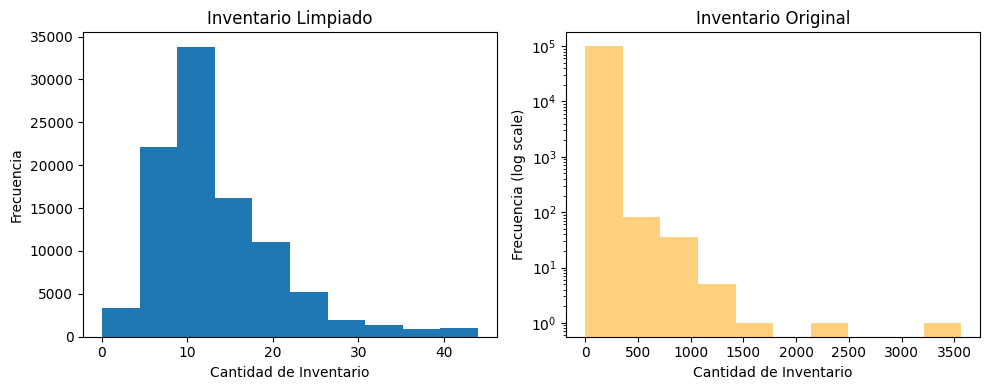

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df_filtered_inventory["OnHandQuantity"])
axes[0].set_xlabel("Cantidad de Inventario")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Inventario Limpiado")

axes[1].hist(df_FactInventory["OnHandQuantity"], color='orange', alpha=0.5)
axes[1].set_xlabel("Cantidad de Inventario")
axes[1].set_ylabel("Frecuencia (log scale)")
axes[1].set_title("Inventario Original")
axes[1].set_yscale('log')


plt.tight_layout()
plt.show()


In [195]:
result_statics_inventory = statics_distribution(df_FactInventory["OnHandQuantity"])

In [196]:
result_statics_inventory

{'OnHandQuantity': {'D’Agostino–Pearson': 266848.14,
  'p-value': 0.0,
  'Skewness': 31.86,
  'Kurtosis': 2139.8}}